<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>


## Popular Games Analysis

### Biblioteca

In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Leitura dos dados

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Informações gerais sobre a base de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Prepare os dados

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
#  Conferir se todas as colunas estão com letras minusculas
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Alterar o tipo de dados em Year_of_Release, porque essa coluna se refere o Ano de Lançamento, assim sendo tem que estar como Inteiro.

df = df.dropna(subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
# Substituir 'tbd' por NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [ ]:
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


A maioria das bibliotecas de análise de dados, como pandas em Python, possuem funções otimizadas para lidar com NaN. Por exemplo, funções como mean(), sum(), e dropna() lidam automaticamente com NaN, enquanto strings como 'tbd' precisariam de tratamento adicional.

In [ ]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [ ]:
# Quero ver todas as colunas onde tem o Genre == NaN para saber que posso tratar

print(df[df['genre'].isna()])


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [ ]:
# Como os dados onde a coluna 'genre' que estão como NaN são insignificantes, resolvi exclui-los, assim também removi onde o 'name' é NaN

df = df.dropna(subset=['genre'])
print(df[df['genre'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [ ]:
# Verificar se o name que sejam NaN tenham sido removidos
print(df[df['name'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [ ]:
print(df[df['platform'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


1. Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.

Esta abordagem é baseada na premissa de que, se houver múltiplas entradas para o mesmo jogo na mesma plataforma, o ano de lançamento mais antigo é o mais provável de ser o correto.

Se ainda restarem valores ausentes após o primeiro passo, a próxima tentativa é preencher com base no ano mínimo para cada jogo (name), independentemente da plataforma. Isso é útil porque o jogo pode ter sido lançado em várias plataformas em diferentes anos, e ter pelo menos o ano mais antigo do jogo é melhor do que deixar o valor ausente.

Apesar de ser menos preciso, quis deixar o campo anos sem nenhum NaN com base no ano mínimo de lançamento para cada plataforma. Este é um último recurso para garantir que nenhum valor NaN permaneça.

2. Por que acha que os valores estão ausentes? Dê possíveis razões.

Erros Humanos: Quando os dados foram inseridos manualmente, pode ter havido omissões ou erros de digitação.
Faltas na Documentação: Informações sobre o ano de lançamento podem não ter sido documentadas corretamente na fonte original dos dados.
Problemas Técnicos: Durante a transferência ou integração dos dados entre diferentes sistemas, pode ter havido falhas que resultaram na perda de informações.


In [ ]:
# Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.
# Substituir 'tbd' por NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Apenas trocando, com o metodo replace, o tbd por NaN

In [ ]:
df['year_of_release'].isna().sum()

0

In [ ]:
# Se necessário, decida como lidar com valores ausentes:

missing_values = df.isnull().sum()
print(missing_values)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


* Conclusão :
    * As colunas Name e Genre têm 2 valores faltantes que foram removidos.
    * A coluna Critic_Score tem muitos valores faltantes (8137 não-nulos de 16715).
    * A coluna Rating também tem 6766 valores faltantes.
    * A coluna User_Score contém 6701 valores faltantes
    

### Remover linhas duplicadas

In [ ]:
df_cleaned = df.drop_duplicates()

In [ ]:
# Verificar o DataFrame após a remoção de duplicatas
print("DataFrame sem linhas duplicadas:")
print(df_cleaned)

DataFrame sem linhas duplicadas:
                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [ ]:
# Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
# Coloquei em ordem decrescente de total_sales

df.sort_values(by='total_sales', ascending=False)
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

## Etapa 3. Analise os dados

### Veja quantos jogos foram lançados em anos diferentes

In [ ]:
df_new = df.groupby(['year_of_release']).count().reset_index().drop(columns = ['name','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating','total_sales'])
df_new = df_new.rename(columns = {'platform': 'numero_de_jogos'})
print(df_new.head(50))

    year_of_release  numero_de_jogos
0              1980                9
1              1981               46
2              1982               36
3              1983               17
4              1984               14
5              1985               14
6              1986               21
7              1987               16
8              1988               15
9              1989               17
10             1990               16
11             1991               41
12             1992               43
13             1993               60
14             1994              121
15             1995              219
16             1996              263
17             1997              289
18             1998              379
19             1999              338
20             2000              350
21             2001              482
22             2002              829
23             2003              775
24             2004              762
25             2005              939
2

<AxesSubplot:title={'center':'Número de jogos Lançados por Ano'}, xlabel='Ano de lançamento', ylabel='Quantidade de jogos'>

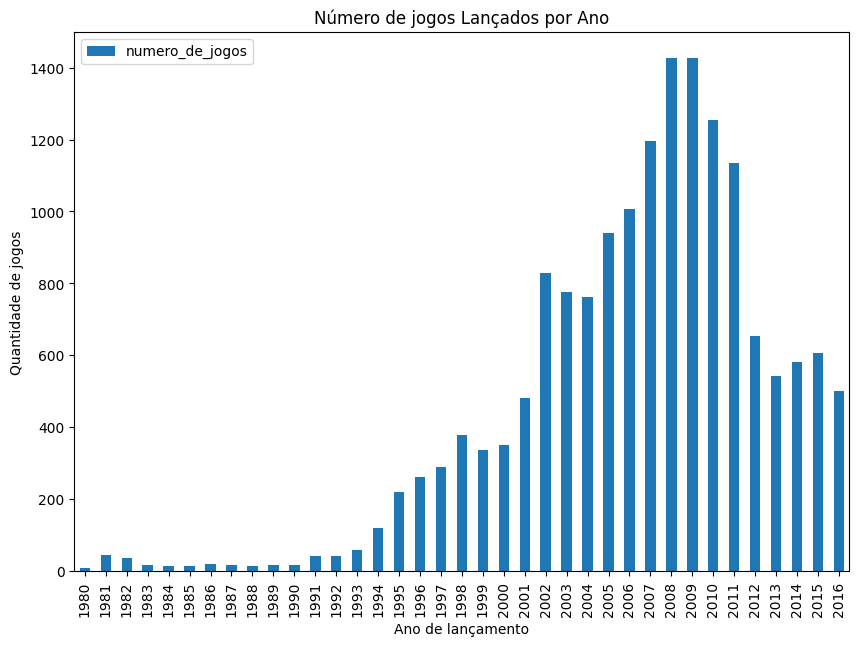

In [ ]:
df_new.plot(title = 'Número de jogos Lançados por Ano',
                        x = 'year_of_release',
                        y='numero_de_jogos',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento',
                        ylabel = 'Quantidade de jogos',
                        figsize = [10,7]

                        )


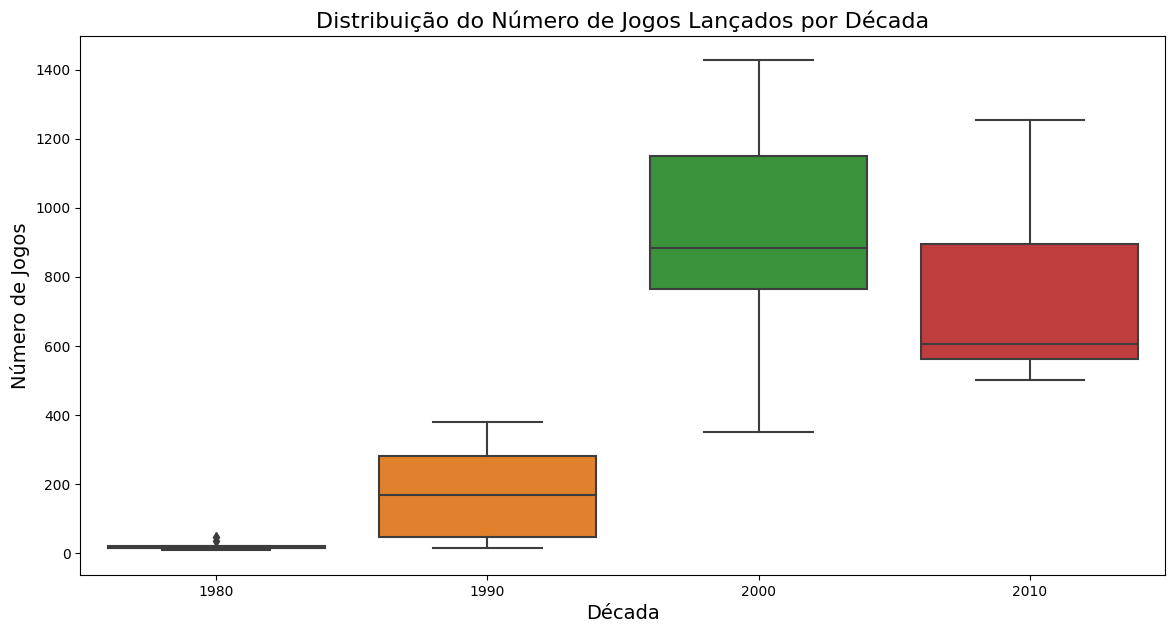

In [ ]:
# Criar boxplot para comparar a distribuição dos lançamentos por década
df_new['decade'] = (df_new['year_of_release'] // 10) * 10
plt.figure(figsize=(14, 7))
sns.boxplot(x='decade', y='numero_de_jogos', data=df_new)
plt.title('Distribuição do Número de Jogos Lançados por Década', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Número de Jogos', fontsize=14)
plt.show()

Os dados de cada período são significativos?
São significativos, pois conseguimos observar as tendencia de crescimento ou queda, muito importante para fazer uma boa análise.

Analisando o número de jogos lançados de 1980 a 2016, observamos:

Crescimento Inicial: Houve um aumento constante nos lançamentos anuais até o início dos anos 2000, impulsionado por avanços tecnológicos e a popularidade crescente dos videogames.
Pico de Lançamentos: O número de jogos lançados atingiu seu auge entre 2005 e 2010, especialmente em 2008 e 2009, com mais de 1400 jogos lançados por ano, coincidente com a sétima geração de consoles (Xbox 360, PlayStation 3, Wii).
Declínio Pós-2010: Após 2010, houve uma queda significativa nos lançamentos anuais, refletindo a saturação do mercado, transições de console e a mudança para jogos móveis e digitais.
Impacto dos Ciclos de Consoles: O número de lançamentos está frequentemente alinhado com a introdução de novas gerações de consoles, indicando que novos hardwares impulsionam o desenvolvimento de jogos.

#### Veja como as vendas variaram de plataforma para plataforma.

In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


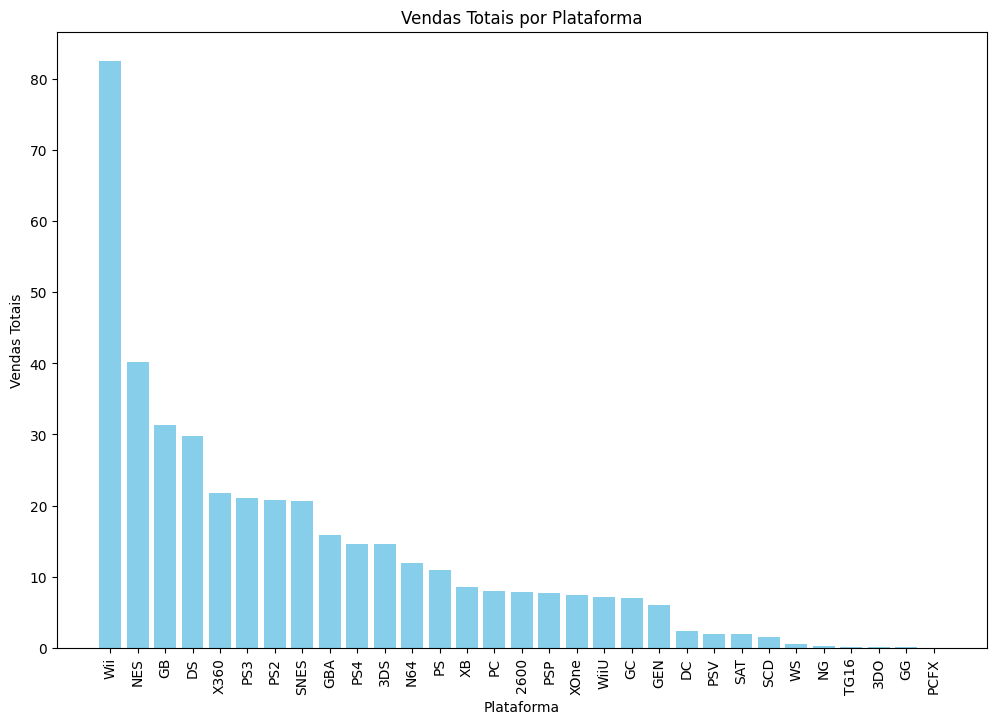

In [ ]:
#  Fazer um grafico
plt.figure(figsize=[12, 8])
plt.bar(df['platform'], df['total_sales'], color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Plataforma')
plt.xticks(rotation=90)
plt.show()

#### Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Gerações de Consoles: O tempo médio de vida de uma geração de consoles de videogame pode variar, mas geralmente está na faixa de 5 a 7 anos. Por exemplo, o PS4 foi lançado em 2013 e o PS5 em 2020, dando uma vida útil de aproximadamente 7 anos para o PS4.

Plataformas Portáteis: Plataformas portáteis, como o Nintendo DS e o Nintendo 3DS, podem ter ciclos de vida mais curtos, geralmente de 5 a 6 anos, devido à rápida evolução da tecnologia móvel.

#### Plataformas que Costumavam ser Populares, mas Agora Não Têm Vendas:

Sega Dreamcast: Lançado em 1999, teve uma vida curta e foi descontinuado em 2001 devido a vendas fracas.
Nintendo GameCube: Lançado em 2001, foi substituído pelo Wii em 2006 devido a vendas abaixo das expectativas.
PlayStation Portable (PSP): Lançado em 2004, teve um declínio gradual após o lançamento do PlayStation Vita em 2011.


####  Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

As novas gerações de consoles geralmente surgem a cada 5-7 anos, com empresas como Sony, Microsoft e Nintendo lançando sucessores para seus consoles mais antigos. Por exemplo, o PlayStation 4 foi lançado em 2013 e o PlayStation 5 em 2020.

In [ ]:
df_distribution = df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
print(df_distribution)

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
77       NES             1983        10.96
..       ...              ...          ...
156      PS4             2016        69.25
152      PS3             2016         3.60
17       3DS             2016        15.14
224     X360             2016         1.52
237     XOne             2016        26.15

[238 rows x 3 columns]


Conclusão : O ciclo de vida das plataformas de videogame é influenciado por uma combinação de avanços tecnológicos, mudanças no mercado e preferências dos consumidores. Novas plataformas surgem regularmente para substituir as antigas, que eventualmente se tornam obsoletas. O tempo exato para o surgimento de novas plataformas e o desaparecimento das antigas pode variar, mas geralmente está dentro de um intervalo de 5 a 7 anos para gerações de consoles principais. Compreender esses ciclos é fundamental para empresas no planejamento de novos lançamentos e estratégias de mercado na indústria de videogames.

#### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

In [ ]:
df_sales_platform = df.groupby(['platform']).sum().reset_index().sort_values(by = 'total_sales', ascending = False).drop(columns=['year_of_release','critic_score','user_score'])
print(df_sales_platform)

   platform  na_sales  eu_sales  jp_sales  other_sales  total_sales
16      PS2    572.92    332.63    137.54       190.47      1233.56
28     X360    595.74    268.32     12.30        84.88       961.24
17      PS3    390.13    327.21     79.41       134.59       931.34
26      Wii    486.87    258.32     68.28        77.71       891.18
4        DS    380.31    188.41    175.02        59.04       802.78
15       PS    334.72    212.39    139.78        40.69       727.58
18      PS4    108.74    141.09     15.96        48.35       314.14
6       GBA    184.12     74.59     46.56         7.61       312.88
19      PSP    107.27     65.62     75.88        40.76       289.53
2       3DS     82.65     61.27    100.62        13.27       257.81
13       PC     93.34    140.37      0.17        21.88       255.76
5        GB    113.64     47.51     85.12         8.16       254.43
29       XB    182.06     59.65      1.38         8.48       251.57
11      NES    125.94     21.15     98.65       

Plataformas Relevantes: Devemos concentrar nossa análise nas plataformas que ainda têm vendas significativas ou potencial de mercado em 2017. Isso pode incluir plataformas como PS4, Xbox One, PC, Wii entre outras, que estavam ativas e relevantes na época.

Plataformas Líderes em Vendas em 2016:

PS4: Com 164 jogos lançados em 2016, é a plataforma com o maior número de lançamentos.
XOne: Com 87 jogos lançados, também é uma das principais plataformas em termos de lançamentos.
PSV: Com 85 jogos lançados, embora não seja tão alto quanto PS4 e XOne, ainda é significativo.
PC: Com 54 jogos lançados, mostra uma presença forte no mercado de jogos para PC.

Baseando-se nos dados de 2016 e considerando plataformas que estão crescendo ou mantendo uma presença forte, as seguintes plataformas podem ser vistas como potencialmente lucrativas:
PS4: Continua sendo uma líder forte com um alto número de lançamentos.
XOne: Também mostra crescimento e uma base de usuários significativa.
PC: Sempre presente no mercado devido à sua versatilidade e suporte contínuo.

In [ ]:
df_new = df.groupby(['year_of_release','platform']).count().reset_index().sort_values(by='year_of_release', ascending=False).drop(columns = ['name','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'])
df_new = df_new.rename(columns = {'total_sales': 'numero_de_jogos'})
print(df_new.head(30))

     year_of_release platform  numero_de_jogos
237             2016     XOne               87
236             2016     X360               13
235             2016     WiiU               14
234             2016      Wii                1
233             2016      PSV               85
232             2016      PS4              164
231             2016      PS3               38
230             2016       PC               54
229             2016      3DS               46
224             2015      PSV              110
219             2015      3DS               86
220             2015       PC               50
222             2015      PS4              137
223             2015      PSP                3
221             2015      PS3               73
225             2015      Wii                4
227             2015     X360               35
228             2015     XOne               80
226             2015     WiiU               28
214             2014      PSV              100
209          

In [ ]:
first_sale = df.groupby('platform')['year_of_release'].min()
peak_sale = df.loc[df.groupby('platform')['total_sales'].idxmax()].set_index('platform')['year_of_release'].astype(int)
first_sale


platform
2600    1980
3DO     1994
3DS     2011
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2011
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: int64

Aqui, o código calcula o ano de lançamento inicial para cada plataforma e o ano de pico de vendas para cada plataforma.

In [ ]:
peak_sale_by_platform = peak_sale - first_sale
print(peak_sale_by_platform)

platform
2600     2
3DO      1
3DS      2
DC       0
DS      21
GB       8
GBA      2
GC       0
GEN      2
GG       0
N64      0
NES      2
NG       1
PC      24
PCFX     0
PS       3
PS2      4
PS3      7
PS4      2
PSP      1
PSV      3
SAT      1
SCD      0
SNES     0
TG16     0
WS       1
Wii      0
WiiU     2
X360     5
XB       4
XOne     2
Name: year_of_release, dtype: int64


Em quanto tempo um Plataforma chegou ao pico de vendas

In [ ]:
print(peak_sale_by_platform.mean())


3.225806451612903


#### Aqui mostra quanto tempo em media as plataformas ficam no mercado

In [ ]:
df_data_1 = df.groupby(['platform'])['year_of_release'].min().reset_index()
df_data_2 = df.groupby(['platform'])['year_of_release'].max(). reset_index()
df_data_difference = df_data_2['year_of_release'] - df_data_1['year_of_release']
print(df_data_difference)
print(df_data_difference.mean())
print(df_data_difference.median())

0      9
1      1
2      5
3     10
4     28
5     13
6      7
7      6
8      4
9      0
10     6
11    11
12     3
13    31
14     0
15     9
16    11
17    10
18     3
19    11
20     5
21     5
22     1
23     9
24     0
25     2
26    10
27     4
28    11
29     8
30     3
Name: year_of_release, dtype: int64
7.612903225806452
6.0


A média das diferenças de anos entre o primeiro e o último ano de lançamento das plataformas é aproximadamente 7.61 anos.
A mediana das diferenças é 6 anos.
Isso indica que, em média, uma plataforma de videogame tende a ficar disponível no mercado por cerca de 7 a 8 anos desde o seu primeiro lançamento até o seu último lançamento.

<AxesSubplot:xlabel='year_of_release'>

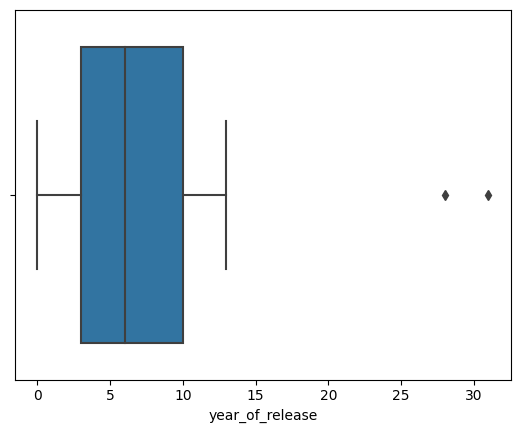

In [ ]:
sns.boxplot(df_data_difference)

Esse grafico nos diz que a mediana é proxima a média de anos, ou seja,  a distribuição dos dados tende a ser aproximadamente simétrica. Isso significa que há uma distribuição equilibrada de valores em ambos os lados da média. Se a mediana e a média são próximas, isso sugere que não há outliers extremamente influentes que distorçam significativamente a média para longe da mediana.

Interessado em visualizar a distribuição de dados ao longo dos anos.

In [ ]:
df_distribution

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
77,NES,1983,10.96
...,...,...,...
156,PS4,2016,69.25
152,PS3,2016,3.60
17,3DS,2016,15.14
224,X360,2016,1.52


In [ ]:
df_distribution_ps2 = df_distribution[df_distribution['platform'] == 'PS2'].sort_values(by='year_of_release', ascending = True)
df_distribution_x360 = df_distribution[df_distribution['platform'] == 'X360'].sort_values(by='year_of_release', ascending = True)
df_distribution_ps3 = df_distribution[df_distribution['platform'] == 'PS3'].sort_values(by='year_of_release', ascending = True)
df_distribution_wii = df_distribution[df_distribution['platform'] == 'Wii'].sort_values(by='year_of_release', ascending = True)
df_distribution_ds = df_distribution[df_distribution['platform'] == 'DS'].sort_values(by='year_of_release', ascending = True)
df_distribution_ps = df_distribution[df_distribution['platform'] == 'PS'].sort_values(by='year_of_release', ascending = True)


In [ ]:
df_merge = pd.merge(df_distribution_ps2, df_distribution_x360, on=['year_of_release', 'total_sales', 'platform'], how='outer')
df_merge = pd.merge(df_merge, df_distribution_ps3, on=['year_of_release', 'total_sales', 'platform'], how='outer')
df_merge = pd.merge(df_merge, df_distribution_wii, on=['year_of_release', 'total_sales', 'platform'], how='outer')
df_merge = pd.merge(df_merge, df_distribution_ds, on=['year_of_release', 'total_sales', 'platform'], how='outer')
df_merge = pd.merge(df_merge, df_distribution_ps, on=['year_of_release', 'total_sales', 'platform'], how='outer')
df_merge = df_merge.sort_values(by='year_of_release')
df_merge

,platform,year_of_release,total_sales
46,DS,1985,0.02
57,PS,1994,6.03
58,PS,1995,35.96
59,PS,1996,94.70
60,PS,1997,136.17
...,...,...,...
44,Wii,2015,1.14
22,X360,2015,11.96
23,X360,2016,1.52
34,PS3,2016,3.60


In [ ]:
print(df_distribution_ps2)

    platform  year_of_release  total_sales
130      PS2             2000        39.17
131      PS2             2001       166.43
132      PS2             2002       205.38
133      PS2             2003       184.31
134      PS2             2004       211.81
135      PS2             2005       160.66
136      PS2             2006       103.42
137      PS2             2007        75.99
138      PS2             2008        53.90
139      PS2             2009        26.40
140      PS2             2010         5.64
141      PS2             2011         0.45


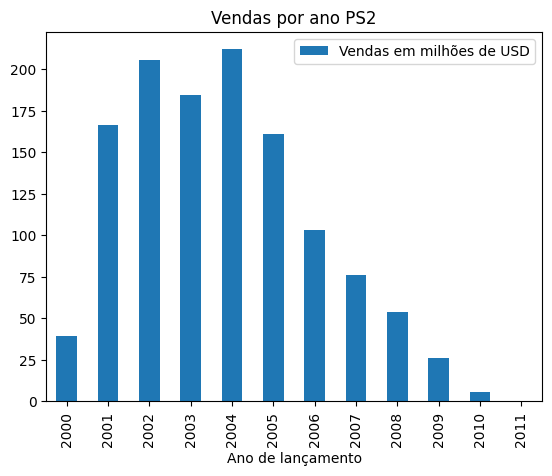

In [ ]:
df_distribution_ps2.plot(title = 'Vendas por ano PS2',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


    platform  year_of_release  total_sales
213     X360             2005         8.25
214     X360             2006        51.62
215     X360             2007        95.41
216     X360             2008       135.26
217     X360             2009       120.29
218     X360             2010       170.03
219     X360             2011       143.84
220     X360             2012        99.74
221     X360             2013        88.58
222     X360             2014        34.74
223     X360             2015        11.96
224     X360             2016         1.52


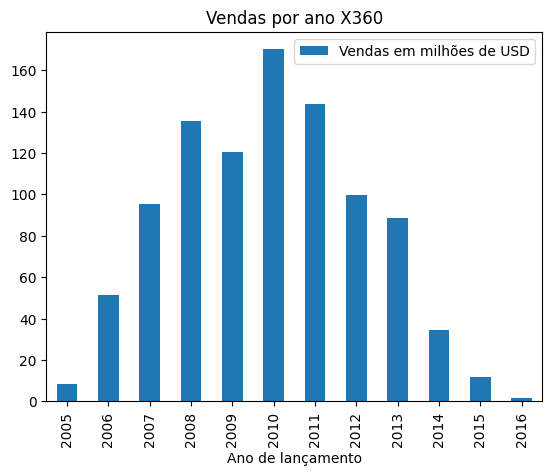

In [ ]:
print(df_distribution_x360)
df_distribution_x360.plot(title = 'Vendas por ano X360',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


    platform  year_of_release  total_sales
142      PS3             2006        20.96
143      PS3             2007        73.19
144      PS3             2008       118.52
145      PS3             2009       130.93
146      PS3             2010       142.17
147      PS3             2011       156.78
148      PS3             2012       107.36
149      PS3             2013       113.25
150      PS3             2014        47.76
151      PS3             2015        16.82
152      PS3             2016         3.60


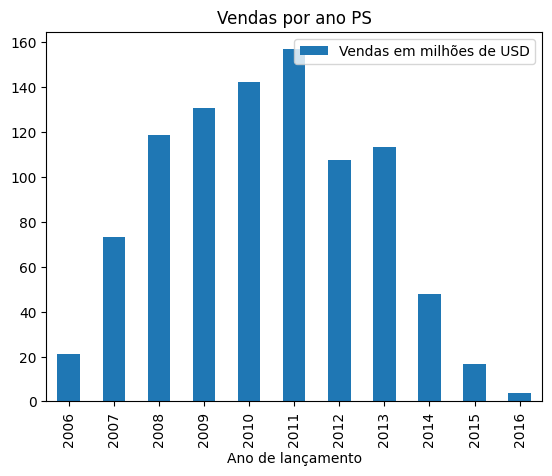

In [ ]:
#  PS3

print(df_distribution_ps3)
df_distribution_ps3.plot(title = 'Vendas por ano PS',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


    platform  year_of_release  total_sales
197      Wii             2006       137.15
198      Wii             2007       152.77
199      Wii             2008       171.32
200      Wii             2009       206.97
201      Wii             2010       127.95
202      Wii             2011        59.65
203      Wii             2012        21.71
204      Wii             2013         8.59
205      Wii             2014         3.75
206      Wii             2015         1.14
207      Wii             2016         0.18


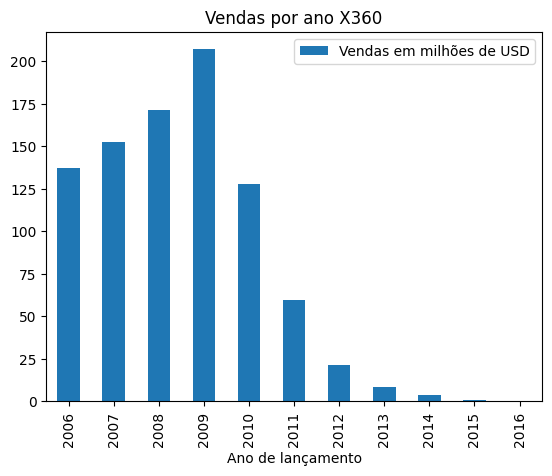

In [ ]:
# Wii
print(df_distribution_wii)
df_distribution_wii.plot(title = 'Vendas por ano X360',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


   platform  year_of_release  total_sales
25       DS             1985         0.02
26       DS             2004        17.27
27       DS             2005       130.14
28       DS             2006       119.81
29       DS             2007       146.94
30       DS             2008       145.31
31       DS             2009       119.54
32       DS             2010        85.02
33       DS             2011        26.18
34       DS             2012        11.01
35       DS             2013         1.54


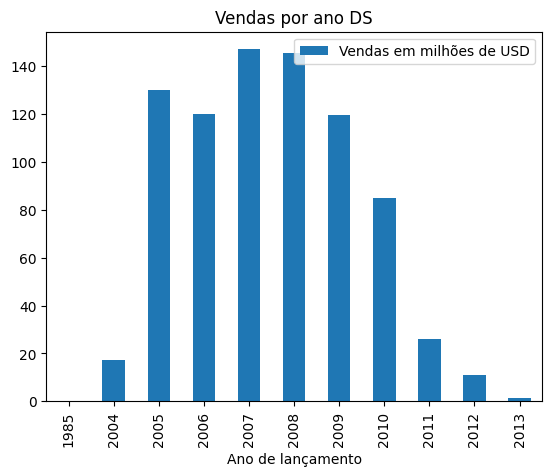

In [ ]:
# DS
print(df_distribution_ds)
df_distribution_ds.plot(title = 'Vendas por ano DS',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


   platform  year_of_release  total_sales
25       DS             1985         0.02
26       DS             2004        17.27
27       DS             2005       130.14
28       DS             2006       119.81
29       DS             2007       146.94
30       DS             2008       145.31
31       DS             2009       119.54
32       DS             2010        85.02
33       DS             2011        26.18
34       DS             2012        11.01
35       DS             2013         1.54


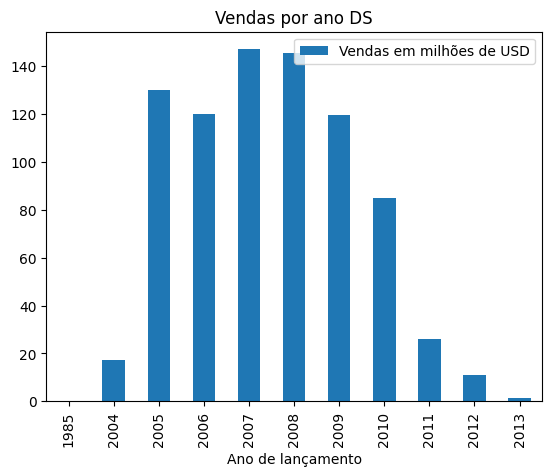

In [ ]:
# PS
print(df_distribution_ds)
df_distribution_ds.plot(title = 'Vendas por ano DS',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])


In [ ]:
print(df_new)

     year_of_release platform  numero_de_jogos
237             2016     XOne               87
236             2016     X360               13
235             2016     WiiU               14
234             2016      Wii                1
233             2016      PSV               85
..               ...      ...              ...
4               1983      NES                6
3               1983     2600               11
2               1982     2600               36
1               1981     2600               46
0               1980     2600                9

[238 rows x 3 columns]


In [ ]:
# Analise dos anos 2013, 2014, 2015 e 2016 por numero de jogos

df_new.sort_values(by='numero_de_jogos', ascending = False, inplace = True)
print(df_new[df_new['year_of_release'] == 2013])
print()
print(df_new[df_new['year_of_release'] == 2014])
print()
print(df_new[df_new['year_of_release'] == 2015])
print()
print(df_new[df_new['year_of_release'] == 2016])

     year_of_release platform  numero_de_jogos
201             2013      PS3              126
198             2013      3DS               91
207             2013     X360               75
204             2013      PSV               63
203             2013      PSP               54
206             2013     WiiU               42
200             2013       PC               38
208             2013     XOne               19
202             2013      PS4               16
205             2013      Wii               12
199             2013       DS                8

     year_of_release platform  numero_de_jogos
211             2014      PS3              108
214             2014      PSV              100
209             2014      3DS               80
212             2014      PS4               75
217             2014     X360               63
218             2014     XOne               61
210             2014       PC               47
216             2014     WiiU               31
213         

PS4 e Xbox One (XOne): Em 2016, PS4 liderou com 164 jogos lançados, seguido pelo Xbox One com 87 jogos. Essas plataformas demonstraram um número significativo de lançamentos, indicando um forte suporte da indústria de desenvolvimento para consoles de última geração.

Plataformas Portáteis (3DS e PS Vita): O Nintendo 3DS e o PS Vita mostraram um número consistente de lançamentos ao longo desses anos, com destaque para o PS Vita em 2014 e 2015. Isso sugere um suporte contínuo para jogos portáteis, apesar da ascensão dos jogos móveis.

Declínio de Plataformas Mais Antigas: Plataformas mais antigas, como PS3, Xbox 360 (X360), Wii e Wii U, viram uma diminuição no número de jogos lançados a partir de 2014. Isso é esperado à medida que o foco da indústria se desloca para hardware mais recente.

Impacto das Novas Gerações: A transição para PS4 e Xbox One como plataformas principais para desenvolvimento é evidente, refletindo o ciclo natural de vida das plataformas de videogame.

Variação Anual e Ciclos de Desenvolvimento: Anos como 2013 e 2015 apresentaram uma diversidade maior de lançamentos em comparação com 2014 e 2016, indicando flutuações naturais nos ciclos de desenvolvimento e lançamento de jogos.

In [ ]:
df_sales_games = pd.merge(df_distribution, df_new, on = ['platform','year_of_release'])
print(df_sales_games)

    platform  year_of_release  total_sales  numero_de_jogos
0       2600             1980        11.38                9
1       2600             1981        35.68               46
2       2600             1982        28.88               36
3       2600             1983         5.84               11
4        NES             1983        10.96                6
..       ...              ...          ...              ...
233      PS4             2016        69.25              164
234      PS3             2016         3.60               38
235      3DS             2016        15.14               46
236     X360             2016         1.52               13
237     XOne             2016        26.15               87

[238 rows x 4 columns]


In [ ]:
df_sales_games.sort_values(by = 'total_sales', ascending = False, inplace = True )
print(df_sales_games[df_sales_games['year_of_release'] == (2013)])
print()
print(df_sales_games[df_sales_games['year_of_release'] == (2014)])
print()
print(df_sales_games[df_sales_games['year_of_release'] == (2015)])
print()
print(df_sales_games[df_sales_games['year_of_release'] == (2016)])

    platform  year_of_release  total_sales  numero_de_jogos
204      PS3             2013       113.25              126
203     X360             2013        88.58               75
198      3DS             2013        56.57               91
206      PS4             2013        25.99               16
201     WiiU             2013        21.65               42
205     XOne             2013        18.96               19
199       PC             2013        12.38               38
200      PSV             2013        10.59               63
207      Wii             2013         8.59               12
202      PSP             2013         3.14               54
208       DS             2013         1.54                8

    platform  year_of_release  total_sales  numero_de_jogos
215      PS4             2014       100.00               75
212     XOne             2014        54.07               61
210      PS3             2014        47.76              108
211      3DS             2014        43

PS4 e Xbox One (XOne): Continuaram a liderar em vendas tanto em 2015 quanto em 2016, com um número considerável de jogos lançados.
PS3 e Xbox 360 (X360): Mostraram declínio nas vendas e número de jogos lançados ao longo desses anos, refletindo a transição para plataformas mais recentes.
3DS e PS Vita (PSV): Mantiveram uma presença sólida, especialmente o 3DS, com um número relativamente estável de jogos lançados e vendas consistentes.
PC: Apresentou um número significativo de jogos lançados, com vendas que, embora menores em comparação com consoles, mostram uma presença constante no mercado.
Wii e PSP: Mostraram números muito baixos tanto em vendas quanto em lançamentos de jogos, indicando o fim de suporte para essas plataformas.

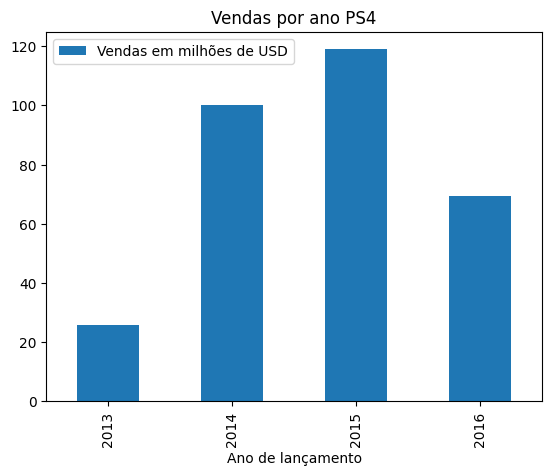

In [ ]:
df_distribution_ps4 = df_distribution[df_distribution['platform'] == 'PS4'].sort_values(by='year_of_release', ascending = True)
df_distribution_ps4.plot(title = 'Vendas por ano PS4',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])

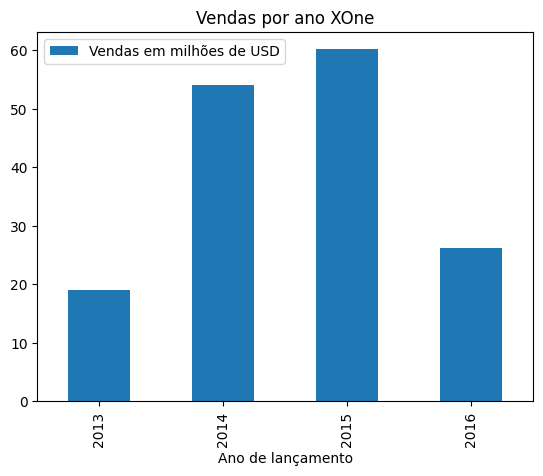

In [ ]:
df_distribution_xone = df_distribution[df_distribution['platform'] == 'XOne'].sort_values(by='year_of_release', ascending = True)
df_distribution_xone.plot(title = 'Vendas por ano XOne',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])

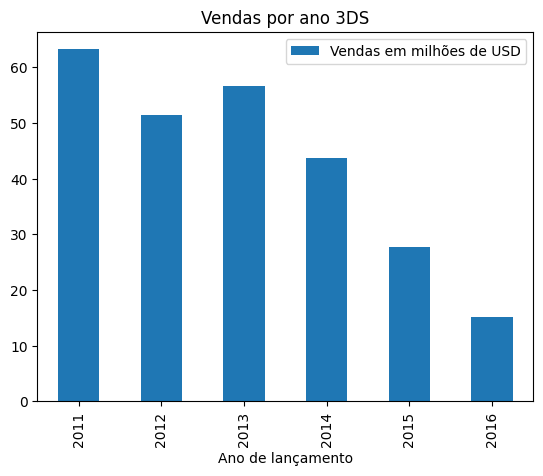

In [ ]:
df_distribution_3ds = df_distribution[df_distribution['platform'] == '3DS'].sort_values(by='year_of_release', ascending = True)
df_distribution_3ds.plot(title = 'Vendas por ano 3DS',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])

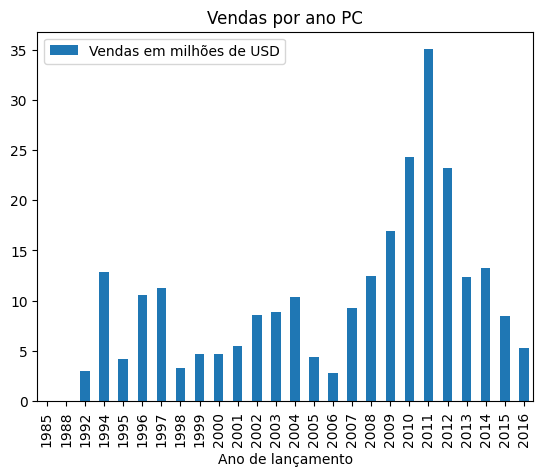

In [ ]:
df_distribution_pc = df_distribution[df_distribution['platform'] == 'PC'].sort_values(by='year_of_release', ascending = True)
df_distribution_pc.plot(title = 'Vendas por ano PC',
                        x = 'year_of_release',
                        y='total_sales',
                        kind = 'bar',
                        xlabel = 'Ano de lançamento'
                        )
plt.legend(['Vendas em milhões de USD'])



A análise revela que as plataformas com potencial de vendas em 2017 são PS4, XOne, PC e 3DS, enquanto outras perderam relevância. Embora PSV ainda possa ser relevante, parece haver muitos lançamentos em relação às vendas. Alguns pontos importantes observados são:

Parece que estamos no fim de um ciclo para várias plataformas, incluindo as principais, que mostram uma tendência de queda nas vendas.

Um pequeno número de plataformas domina quase todo o mercado.

A diminuição nas vendas pode ser explicada pelo ciclo de vida das plataformas, geralmente entre 4 a 6 anos, exceto o PC, que é uma exceção.

A evolução rápida da tecnologia sugere que novas gerações de plataformas podem ser lançadas com maior frequência.

Para nossa análise, os dados mais relevantes são os de 2014 a 2016.

As plataformas mais lucrativas são PS4, XOne, 3DS (com declínio claro), PC e possivelmente PSV.

Todas as plataformas estão mostrando uma tendência de queda nas vendas.

0.8013775510204081


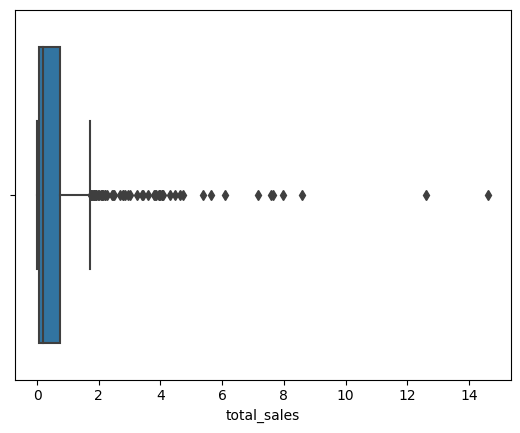

In [ ]:
df_sales_total_ps4 = df[df['platform'] == 'PS4']
sns.boxplot(df_sales_total_ps4['total_sales'])

print(df_sales_total_ps4['total_sales'].mean())

0.6450202429149797


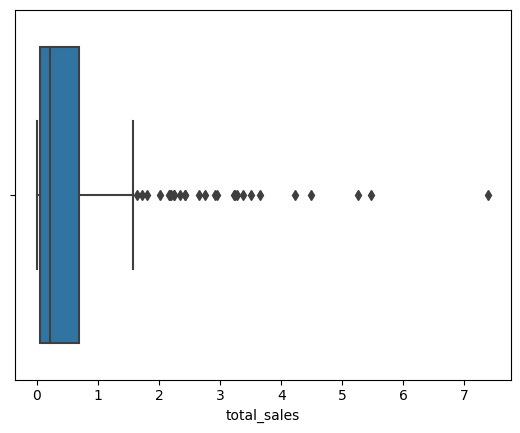

In [ ]:
df_sales_total_xone = df[df['platform'] == 'XOne']
sns.boxplot(df_sales_total_xone['total_sales'])

print(df_sales_total_xone['total_sales'].mean())

0.6450202429149797


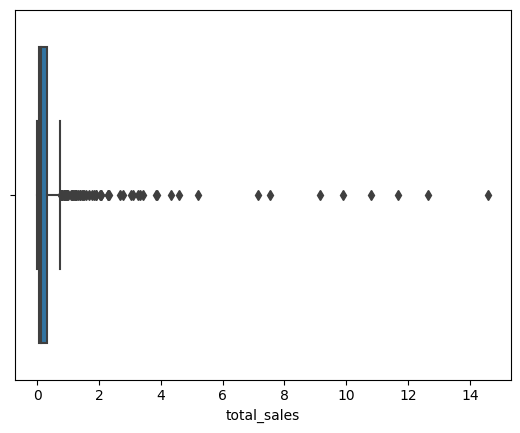

In [ ]:
df_sales_total_3ds = df[df['platform'] == '3DS']
sns.boxplot(df_sales_total_3ds['total_sales'])

print(df_sales_total_xone['total_sales'].mean())

0.267251828631139


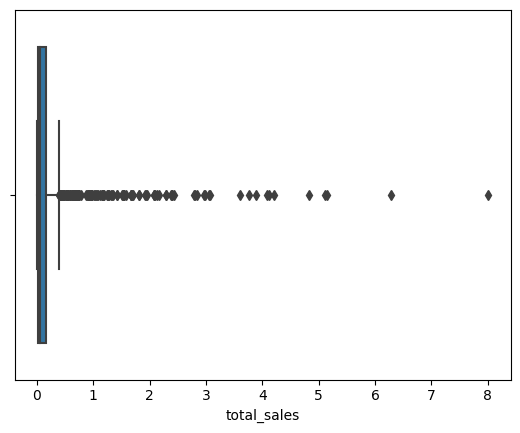

In [ ]:
df_sales_total_pc = df[df['platform'] == 'PC']
sns.boxplot(df_sales_total_pc['total_sales'])

print(df_sales_total_pc['total_sales'].mean())

PS4:
Vendas Totais: A plataforma PS4 teve um desempenho sólido em termos de vendas totais, com média de aproximadamente 0.801 milhões de USD por jogo.
Relação com Pontuações dos Críticos: Existe uma correlação positiva moderada entre as vendas totais de jogos para PS4 e as pontuações dos críticos (coeficiente de correlação de 0.407). Isso sugere que jogos bem avaliados tendem a ter vendas totais mais altas, embora outros fatores também possam influenciar.
Xbox One (XOne):
Vendas Totais: A média das vendas totais de jogos para Xbox One foi de aproximadamente 0.645 milhões de USD por jogo.
Análise de Vendas: Embora não tenhamos aprofundado tanto quanto fizemos para o PS4, a plataforma mostra um desempenho sólido em termos de vendas totais.
Nintendo 3DS:
Vendas Totais: A plataforma Nintendo 3DS teve uma média de vendas totais de aproximadamente 0.405 milhões de USD por jogo.
Análise de Vendas: Observamos uma distribuição das vendas com mediana inferior aos consoles de mesa, indicando um perfil de consumo diferente, talvez mais concentrado em títulos específicos ou públicos.
PC:
Vendas Totais: A plataforma PC teve uma média de vendas totais de aproximadamente 0.267 milhões de USD por jogo.
Análise de Vendas: Apesar da média de vendas totais mais baixa em comparação com consoles, o PC continua sendo uma plataforma relevante, especialmente devido à sua diversidade de títulos e modelos de distribuição.

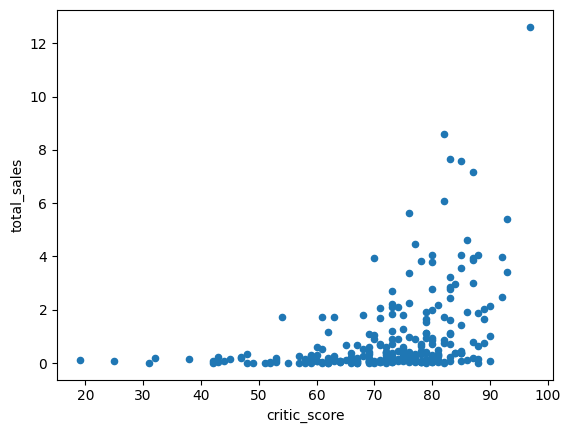

0.406567902061781


In [ ]:

df_critic_score_sales = df_sales_total_ps4.drop(columns = ['name','platform','user_score'])
df_critic_score_sales.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['critic_score']))

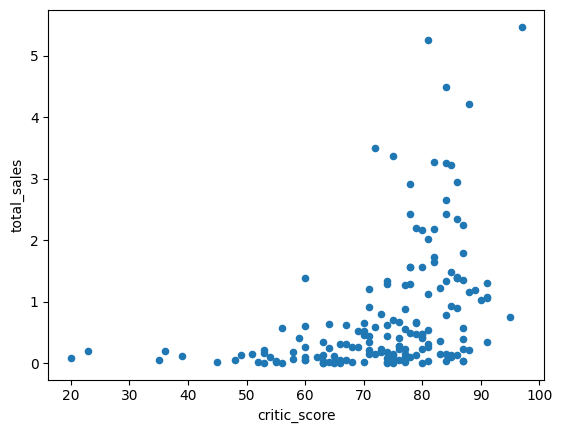

0.41699832800840175


In [ ]:
df_critic_score_sales = df_sales_total_xone.drop(columns = ['name','platform','user_score'])
df_critic_score_sales.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['critic_score']))

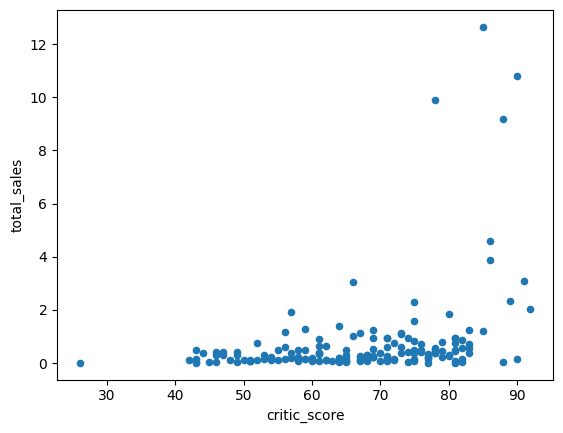

0.34873973059848346


In [ ]:
df_critic_score_sales = df_sales_total_3ds.drop(columns = ['name','platform','user_score'])
df_critic_score_sales.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['critic_score']))

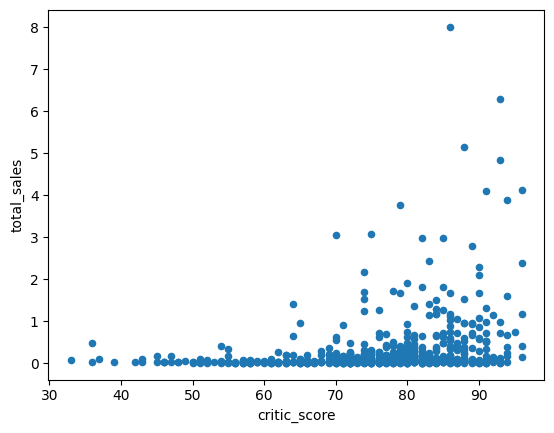

0.2573947184009851


In [ ]:
df_critic_score_sales = df_sales_total_pc.drop(columns = ['name','platform','user_score'])
df_critic_score_sales.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['critic_score']))

PS4:
A correlação entre as vendas totais de jogos para PS4 e as pontuações dos críticos é de aproximadamente 0.407. Isso indica uma relação moderadamente positiva entre jogos bem avaliados pelos críticos e vendas mais altas.
Xbox One (XOne):
A correlação entre as vendas totais de jogos para Xbox One e as pontuações dos críticos é de cerca de 0.417. Similarmente ao PS4, há uma relação moderadamente positiva entre avaliações críticas e vendas totais.
Nintendo 3DS:
A correlação entre as vendas totais de jogos para Nintendo 3DS e as pontuações dos críticos é de aproximadamente 0.349. Isso também indica uma relação positiva entre avaliações críticas e vendas totais, embora um pouco mais fraca em comparação com PS4 e Xbox One.
PC:
A correlação entre as vendas totais de jogos para PC e as pontuações dos críticos é de cerca de 0.257. Isso mostra uma relação positiva, mas mais fraca em comparação com as plataformas de console.
Conclusão:
Para todas as plataformas analisadas (PS4, Xbox One, Nintendo 3DS e PC), há uma tendência de que jogos bem avaliados pelos críticos têm maior probabilidade de ter vendas totais mais altas. Isso destaca a importância das avaliações críticas na decisão dos consumidores e no desempenho comercial dos jogos.

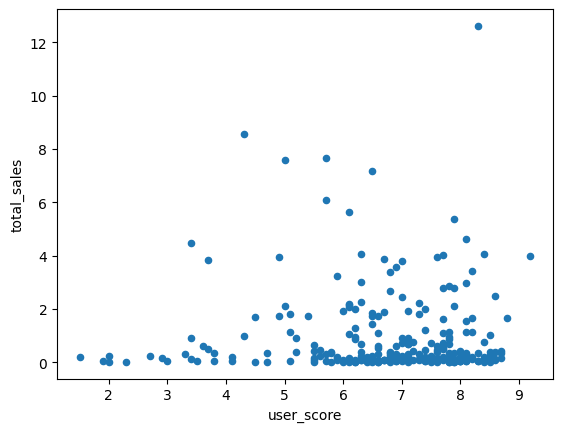

0.012904741611451193


In [ ]:
df_user_score_sales = df_sales_total_ps4.drop(columns = ['name','platform','critic_score'])
df_user_score_sales.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['user_score']))

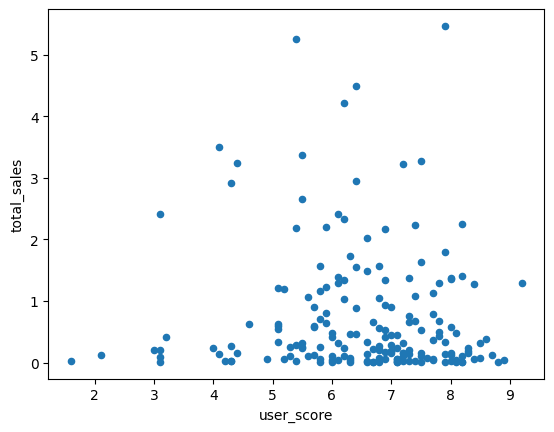

0.012904741611451193


In [ ]:
df_user_score_sales = df_sales_total_xone.drop(columns = ['name','platform','critic_score'])
df_user_score_sales.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['user_score']))

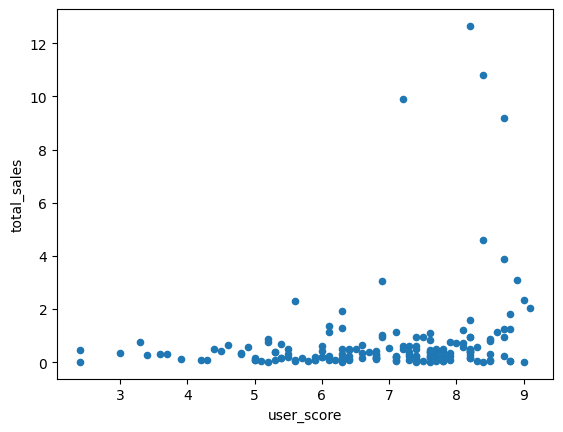

0.012904741611451193


In [ ]:
df_user_score_sales = df_sales_total_3ds.drop(columns = ['name','platform','critic_score'])
df_user_score_sales.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['user_score']))

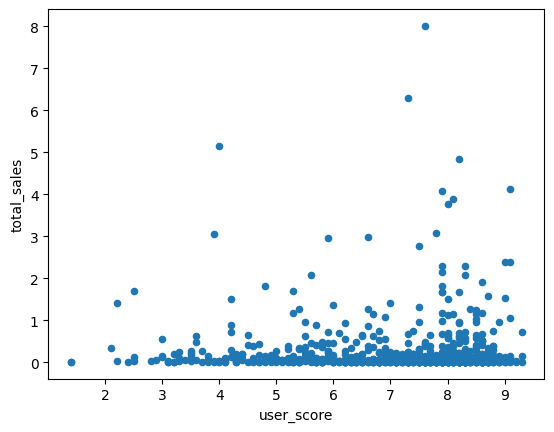

0.012904741611451193


In [ ]:
df_user_score_sales = df_sales_total_pc.drop(columns = ['name','platform','critic_score'])
df_user_score_sales.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.show()
print(df_critic_score_sales['total_sales'].corr(df['user_score']))

explorar a relação entre as vendas totais de jogos na plataforma PS4 e as pontuações dos usuários (user_score).Se o valor for próximo de +1, indica uma correlação positiva forte (à medida que as pontuações dos críticos aumentam, as vendas tendem a aumentar). Se for próximo de -1, indica uma correlação negativa forte (à medida que as pontuações dos críticos aumentam, as vendas tendem a diminuir). Um valor próximo de 0 indica pouca ou nenhuma correlação linear entre as variáveis.

PS4:
A correlação entre as vendas totais de jogos para PS4 e as pontuações dos usuários é de aproximadamente 0.0129. Isso indica uma correlação extremamente fraca entre as vendas totais e as avaliações dos usuários.
Xbox One (XOne):
A correlação entre as vendas totais de jogos para Xbox One e as pontuações dos usuários também é de aproximadamente 0.0129, mostrando uma relação muito fraca entre esses dois fatores.
Nintendo 3DS:
A correlação entre as vendas totais de jogos para Nintendo 3DS e as pontuações dos usuários é a mesma, aproximadamente 0.0129, indicando uma relação muito fraca entre vendas totais e avaliações dos usuários.
PC:
Da mesma forma, a correlação entre as vendas totais de jogos para PC e as pontuações dos usuários é de aproximadamente 0.0129, destacando uma relação extremamente fraca entre esses dois fatores.
Conclusão:
Para todas as plataformas analisadas (PS4, Xbox One, Nintendo 3DS e PC), não há uma correlação significativa entre as vendas totais de jogos e as pontuações atribuídas pelos usuários. Isso sugere que, ao contrário das pontuações dos críticos, as avaliações dos usuários não têm um impacto claro ou consistente sobre as vendas totais.


In [ ]:
# estudar as distribuições dos jogos por genero
df_distribution = df.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])
print(df_distribution)

           genre  total_sales
11      Strategy       172.57
1      Adventure       233.33
5         Puzzle       239.89
9     Simulation       387.96
2       Fighting       442.66
6         Racing       723.49
3           Misc       790.29
4       Platform       825.55
7   Role-Playing       931.08
8        Shooter      1041.36
10        Sports      1309.67
0         Action      1716.52


Etapa 4

In [ ]:
# Fazer um DF para cada plataforma escolhidos com o name, platform, gere e total_sale

df_1 = df[df['platform'] == 'PS4'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_2 = df[df['platform'] == 'XOne'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_3 = df[df['platform'] == '3DS'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_4 = df[df['platform'] == 'PC'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])

In [ ]:
# Criar dois DataFrqmes para poder fazer um novo DataFrame
df_1f = df[df['platform'] == 'PS4'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_1f = df_1f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

df_1 = df_1.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])

dictionary = {'name':'jogos_lancados_ps4'}


df_ps4_specific = pd.merge(df_1f,df_1,on=['genre'])
df_ps4_specific.rename(columns = dictionary, inplace = True)
df_ps4_specific['media'] = df_ps4_specific['total_sales']/df_ps4_specific['jogos_lancados_ps4']
df_ps4_specific = df_ps4_specific.sort_values(by=['media'])
print(df_ps4_specific)
df_1f = df[df['platform'] == 'PS4'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_1f = df_1f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

           genre  jogos_lancados_ps4  total_sales     media
0         Puzzle                   1         0.02  0.020000
2       Strategy                   6         0.62  0.103333
1     Simulation                   6         1.23  0.205000
7      Adventure                  28         6.34  0.226429
6           Misc                  20         8.19  0.409500
4       Fighting                  18         8.65  0.480556
10  Role-Playing                  51        28.99  0.568431
5         Racing                  19        12.14  0.638947
3       Platform                  12         7.69  0.640833
11        Action                 144        96.10  0.667361
9         Sports                  46        55.61  1.208913
8        Shooter                  41        88.56  2.160000


In [ ]:
df_2f = df[df['platform'] == 'XOne'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_2f = df_2f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

df_2 = df_2.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])

dictionary = {'name':'jogos_lancados_xone'}


df_xone_specific = pd.merge(df_2f,df_2,on=['genre'])
df_xone_specific.rename(columns = dictionary, inplace = True)
df_xone_specific['media'] = df_xone_specific['total_sales']/df_xone_specific['jogos_lancados_xone']
df_xone_specific = df_xone_specific.sort_values(by=['media'])
print(df_xone_specific)
df_2f = df[df['platform'] == 'XOne'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_2f = df_2f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

           genre  jogos_lancados_xone  total_sales     media
0       Strategy                    3         0.42  0.140000
1     Simulation                    4         0.69  0.172500
2       Platform                    5         0.93  0.186000
4      Adventure                   14         2.68  0.191429
3       Fighting                    7         2.45  0.350000
6           Misc                   19         7.43  0.391053
10        Action                   85        37.31  0.438941
7         Racing                   20         9.79  0.489500
9         Sports                   38        26.74  0.703684
5   Role-Playing                   14        10.55  0.753571
8        Shooter                   38        60.33  1.587632


In [ ]:
df_3f = df[df['platform'] == '3DS'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_3f = df_3f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

df_3 = df_3.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])

dictionary = {'name':'jogos_lancados_3ds'}


df_3ds_specific = pd.merge(df_3f,df_3,on=['genre'])
df_3ds_specific.rename(columns = dictionary, inplace = True)
df_3ds_specific['media'] = df_3ds_specific['total_sales']/df_3ds_specific['jogos_lancados_3ds']
df_3ds_specific = df_3ds_specific.sort_values(by=['media'])
print(df_3ds_specific)
df_3f = df[df['platform'] == '3DS'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_3f = df_3f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

           genre  jogos_lancados_3ds  total_sales     media
8      Adventure                  37         4.83  0.130541
3       Strategy                  15         2.09  0.139333
0        Shooter                   6         1.22  0.203333
9           Misc                  54        10.99  0.203519
5         Sports                  25         6.15  0.246000
4         Puzzle                  20         5.57  0.278500
11        Action                 187        57.84  0.309305
2       Fighting                  14        10.56  0.754286
7     Simulation                  29        26.96  0.929655
10  Role-Playing                  87        84.20  0.967816
6       Platform                  28        32.53  1.161786
1         Racing                  10        14.87  1.487000


In [ ]:
df_4f = df[df['platform'] == 'PC'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_4f = df_4f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

df_4 = df_4.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])

dictionary = {'name':'jogos_lancados_pc'}


df_pc_specific = pd.merge(df_4f,df_4,on=['genre'])
df_pc_specific.rename(columns = dictionary, inplace = True)
df_pc_specific['media'] = df_pc_specific['total_sales']/df_pc_specific['jogos_lancados_pc']
df_pc_specific = df_pc_specific.sort_values(by=['media'])
print(df_pc_specific)
df_4f = df[df['platform'] == 'PC'].drop(columns = ['rating','user_score','critic_score','other_sales','jp_sales','eu_sales','na_sales','year_of_release'])
df_4f = df_4f.groupby(['genre'])['name'].count().reset_index().sort_values(by=['name'])

           genre  jogos_lancados_pc  total_sales     media
0       Fighting                  5         0.15  0.030000
3         Puzzle                 25         0.91  0.036400
1       Platform                 11         0.46  0.041818
5         Racing                 58         3.78  0.065172
6      Adventure                 65        10.02  0.154154
10        Action                166        30.71  0.185000
4         Sports                 50        11.97  0.239400
11      Strategy                185        45.70  0.247027
9        Shooter                147        43.90  0.298639
2           Misc                 22         8.40  0.381818
8     Simulation                120        52.51  0.437583
7   Role-Playing                103        47.25  0.458738


PS4:
Shooter e Sports são os gêneros com a maior média de vendas por jogo lançado, com 2.16 e 1.21 milhões de USD respectivamente.
Puzzle e Strategy têm as menores médias de vendas por jogo lançado, com apenas 0.02 e 0.10 milhões de USD respectivamente.
Xbox One (XOne):
Shooter é o gênero com a maior média de vendas por jogo lançado, com 1.59 milhões de USD.
Strategy e Simulation têm as menores médias de vendas por jogo lançado, com 0.14 e 0.17 milhões de USD respectivamente.
Nintendo 3DS:
Role-Playing e Platform são os gêneros com a maior média de vendas por jogo lançado, com 0.97 e 1.16 milhões de USD respectivamente.
Adventure tem a menor média de vendas por jogo lançado, com 0.13 milhões de USD.
PC:
Shooter e Strategy são os gêneros com a maior média de vendas por jogo lançado, com 0.30 e 0.25 milhões de USD respectivamente.
Fighting tem a menor média de vendas por jogo lançado, com apenas 0.03 milhões de USD.
Conclusão:
As preferências por gêneros variam significativamente entre plataformas. Jogos do gênero Shooter tendem a ter um desempenho melhor em termos de média de vendas por jogo lançado na PS4 e XOne, enquanto Role-Playing e Platform são mais fortes na Nintendo 3DS. No PC, Shooter também se destaca, juntamente com jogos de Strategy.

fazer a mesma coisa acima para os ooutros 3 jogos

/Etapa 4 - criar um perfil de usuarios para cada região

In [ ]:
df_perfil = df[df['year_of_release'] >= 2012]
df_perfil


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [ ]:

df_an_1plus = df_perfil.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending = False)
print(df_an_1plus.head())

   platform  na_sales
9      X360    140.05
4       PS4    108.74
3       PS3    103.38
10     XOne     93.12
0       3DS     55.31


In [ ]:
df_an_2plus = df_perfil.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending = False)
print(df_an_2plus.head())

           genre  na_sales
0         Action    177.84
8        Shooter    144.77
10        Sports     81.53
7   Role-Playing     64.00
3           Misc     38.19


In [ ]:
df_an_3plus = df_perfil.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending = False)
print(df_an_3plus.head())

  rating  na_sales
2      M    231.57
0      E    114.37
1   E10+     75.70
3      T     66.02


In [ ]:
df_eu_1plus = df_perfil.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending = False)
print(df_eu_1plus.head())

   platform  eu_sales
4       PS4    141.09
3       PS3    106.86
9      X360     74.52
10     XOne     51.59
0       3DS     42.64


In [ ]:
df_eu_2plus = df_perfil.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending = False)
print(df_eu_2plus.head())

           genre  eu_sales
0         Action    159.34
8        Shooter    113.47
10        Sports     69.09
7   Role-Playing     48.53
6         Racing     27.29


In [ ]:
df_eu_3plus = df_perfil.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending = False)
print(df_eu_3plus.head())

  rating  eu_sales
2      M    193.96
0      E    113.03
1   E10+     55.37
3      T     52.96


In [ ]:
df_jp_1plus = df_perfil.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending = False)
print(df_jp_1plus.head())

  platform  jp_sales
0      3DS     87.79
3      PS3     35.29
6      PSV     21.04
4      PS4     15.96
8     WiiU     13.01


In [ ]:
df_jp_2plus = df_perfil.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending = False)
print(df_jp_2plus.head())

          genre  jp_sales
7  Role-Playing     65.44
0        Action     52.80
3          Misc     12.86
9    Simulation     10.41
2      Fighting      9.44


In [ ]:
df_jp_3plus = df_perfil.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending = False)
print(df_jp_3plus.head())

  rating  jp_sales
0      E     28.33
3      T     26.02
2      M     21.20
1   E10+      8.19


In [ ]:
df_other_1plus = df_perfil.groupby(['platform'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending = False)
print(df_other_1plus.head())

   platform  other_sales
4       PS4        48.35
3       PS3        43.26
9      X360        20.40
10     XOne        14.27
0       3DS         8.87


In [ ]:
df_other_2plus = df_perfil.groupby(['genre'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending = False)
print(df_other_2plus.head())

           genre  other_sales
0         Action        51.14
8        Shooter        37.26
10        Sports        22.44
7   Role-Playing        14.83
3           Misc         7.67


In [ ]:
df_other_3plus = df_perfil.groupby(['rating'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending = False)
print(df_other_3plus.head())

  rating  other_sales
2      M        63.38
0      E        31.44
3      T        17.94
1   E10+        16.23


fazer isso para todas as regioes Japão , UE

Vendas na América do Norte (NA):
Plataformas com mais vendas (em milhões de USD):

X360: 140.05
PS4: 108.74
PS3: 103.38
XOne: 93.12
3DS: 55.31
Gêneros com mais vendas:

Action: 177.84
Shooter: 144.77
Sports: 81.53
Role-Playing: 64.00
Misc: 38.19
Classificações etárias com mais vendas:

M (Mature): 231.57
E (Everyone): 114.37
E10+ (Everyone 10 and older): 75.70
T (Teen): 66.02
Vendas na Europa (EU):
Plataformas com mais vendas (em milhões de USD):

PS4: 141.09
PS3: 106.86
X360: 74.52
XOne: 51.59
3DS: 42.64
Gêneros com mais vendas:

Action: 159.34
Shooter: 113.47
Sports: 69.09
Role-Playing: 48.53
Racing: 27.29
Classificações etárias com mais vendas:

M (Mature): 193.96
E (Everyone): 113.03
E10+ (Everyone 10 and older): 55.37
T (Teen): 52.96
Vendas no Japão (JP):
Plataformas com mais vendas (em milhões de USD):

3DS: 87.79
PS3: 35.29
PSV: 21.04
PS4: 15.96
WiiU: 13.01
Gêneros com mais vendas:

Role-Playing: 65.44
Action: 52.80
Misc: 12.86
Simulation: 10.41
Fighting: 9.44
Classificações etárias com mais vendas:

E (Everyone): 28.33
T (Teen): 26.02
M (Mature): 21.20
E10+ (Everyone 10 and older): 8.19
Outras regiões (Other):
Plataformas com mais vendas (em milhões de USD):

PS4: 48.35
PS3: 43.26
X360: 20.40
XOne: 14.27
3DS: 8.87
Gêneros com mais vendas:

Action: 51.14
Shooter: 37.26
Sports: 22.44
Role-Playing: 14.83
Misc: 7.67
Classificações etárias com mais vendas:

M (Mature): 63.38
E (Everyone): 31.44
T (Teen): 17.94
E10+ (Everyone 10 and older): 16.23

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
Para descrever as variações nas quotas de mercado das cinco plataformas principais (PS4, PS3, X360, XOne, 3DS) em diferentes regiões (América do Norte, Europa, Japão e outras regiões), podemos analisar os dados das vendas de jogos a partir de 2012 conforme os grupos que foram anteriormente calculados.

PlayStation 4 (PS4):
América do Norte: Lidera com 108.74 milhões de dólares em vendas.
Europa: Também lidera com 141.09 milhões de dólares em vendas.
Japão: Segue com 15.96 milhões de dólares em vendas.
Outras regiões: Lidera com 48.35 milhões de dólares em vendas.
Variações de quotas de mercado:

PS4 mostra uma forte presença na América do Norte e na Europa, com significativa liderança em ambas as regiões. No entanto, suas vendas no Japão são menores em comparação com outras plataformas como 3DS e PS3.
PlayStation 3 (PS3):
América do Norte: 103.38 milhões de dólares em vendas.
Europa: 106.86 milhões de dólares em vendas.
Japão: 35.29 milhões de dólares em vendas.
Outras regiões: 43.26 milhões de dólares em vendas.
Variações de quotas de mercado:

PS3 mantém uma posição forte tanto na América do Norte quanto na Europa, com vendas robustas. No Japão, sua performance é considerável, mas menor do que a de 3DS. Nas outras regiões, suas vendas são significativas, mas também superadas por PS4.
Xbox 360 (X360):
América do Norte: Lidera com 140.05 milhões de dólares em vendas.
Europa: 74.52 milhões de dólares em vendas.
Japão: Não está entre os líderes com 0 milhões de dólares em vendas.
Outras regiões: 20.40 milhões de dólares em vendas.
Variações de quotas de mercado:

X360 domina a América do Norte com uma liderança clara. Na Europa, suas vendas são significativas, mas consideravelmente menores do que na América do Norte. No Japão e outras regiões, suas vendas são muito limitadas.
Xbox One (XOne):
América do Norte: 93.12 milhões de dólares em vendas.
Europa: 51.59 milhões de dólares em vendas.
Japão: 15.96 milhões de dólares em vendas.
Outras regiões: 14.27 milhões de dólares em vendas.
Variações de quotas de mercado:

XOne possui vendas consideráveis na América do Norte, embora inferiores às do PS4 e X360. Na Europa, suas vendas são significativas, mas também inferiores às de PS4 e PS3. No Japão e outras regiões, suas vendas são limitadas em comparação com as outras plataformas.
Nintendo 3DS (3DS):
América do Norte: 55.31 milhões de dólares em vendas.
Europa: 42.64 milhões de dólares em vendas.
Japão: Lidera com 87.79 milhões de dólares em vendas.
Outras regiões: 8.87 milhões de dólares em vendas.
Variações de quotas de mercado:

3DS lidera de forma destacada no Japão, com vendas muito superiores às das outras plataformas. Nas Américas e Europa, suas vendas são significativas, mas menores em comparação com PS4 e PS3. Nas outras regiões, suas vendas são muito limitadas.
Conclusão:
Cada plataforma mostra variações distintas em suas quotas de mercado ao longo das diferentes regiões. As diferenças refletem as preferências regionais e estratégias de marketing implementadas pelas fabricantes de consoles e desenvolvedoras de jogos. Enquanto algumas plataformas como PS4 e X360 dominam certas regiões, outras como 3DS têm um desempenho muito forte em mercados específicos, como o Japão. Essas análises são cruciais para entender o panorama global das vendas de jogos e podem orientar decisões estratégicas para lançamentos futuros.


Os cinco principais gêneros. Explique a diferença.

Com base nos dados fornecidos, os cinco principais gêneros de jogos são Action, Shooter, Sports, Role-Playing e Misc (Miscellaneous, que engloba jogos de diversos gêneros não especificados de forma clara).

Action:
América do Norte: Lidera com 177.84 milhões de dólares em vendas.
Europa: 159.34 milhões de dólares em vendas.
Japão: 52.80 milhões de dólares em vendas.
Outras regiões: 51.14 milhões de dólares em vendas.
Explicação: O gênero Action é universalmente popular, liderando em vendas tanto na América do Norte quanto na Europa. No entanto, suas vendas no Japão são consideravelmente menores em comparação com as outras regiões.

Shooter:
América do Norte: Segue com 144.77 milhões de dólares em vendas.
Europa: 113.47 milhões de dólares em vendas.
Japão: 37.26 milhões de dólares em vendas.
Outras regiões: 14.83 milhões de dólares em vendas.
Explicação: O gênero Shooter é muito popular na América do Norte e Europa, com vendas significativas. No entanto, suas vendas no Japão são substancialmente menores. Nas outras regiões, o gênero também é popular, mas não tanto quanto nas Américas e Europa.

Sports:
América do Norte: 81.53 milhões de dólares em vendas.
Europa: 69.09 milhões de dólares em vendas.
Japão: 10.55 milhões de dólares em vendas.
Outras regiões: 22.44 milhões de dólares em vendas.
Explicação: Sports é um gênero que tem um bom desempenho nas Américas e Europa, com vendas consideráveis. No entanto, suas vendas no Japão são notavelmente menores. Nas outras regiões, o gênero tem uma presença, mas também não é dominante como nas Américas e Europa.

Role-Playing (RPG):
América do Norte: 64.00 milhões de dólares em vendas.
Europa: 48.53 milhões de dólares em vendas.
Japão: 65.44 milhões de dólares em vendas.
Outras regiões: 10.41 milhões de dólares em vendas.
Explicação: RPG é extremamente popular no Japão, liderando as vendas nessa região. Nas Américas e Europa, suas vendas são boas, mas menores em comparação com o Japão. Nas outras regiões, o gênero tem vendas limitadas.

Misc (Miscellaneous):
América do Norte: 38.19 milhões de dólares em vendas.
Europa: 27.29 milhões de dólares em vendas.
Japão: 12.86 milhões de dólares em vendas.
Outras regiões: 7.67 milhões de dólares em vendas.
Explicação: Misc engloba uma variedade de gêneros não especificados detalhadamente, refletindo uma diversidade de preferências nas diferentes regiões. Seu desempenho é moderado em todas as regiões, sem dominar particularmente em nenhuma.

Conclusão:
Cada gênero mostra variações distintas em suas vendas e popularidade em diferentes regiões. A preferência por determinados gêneros pode ser influenciada por fatores culturais, históricos e demográficos específicos de cada região. Essas diferenças são fundamentais para entender o mercado global de jogos e podem orientar estratégias de desenvolvimento e marketing para atender às demandas específicas de cada mercado regional.

As classificações do ESRB afetam as vendas em regiões individuais?

Sim, as classificações do ESRB podem afetar as vendas de jogos em diferentes regiões devido a vários fatores que incluem preferências culturais, restrições legais e expectativas dos consumidores. Aqui estão alguns pontos importantes a considerar:

América do Norte
Nos Estados Unidos e no Canadá, as classificações do ESRB são amplamente reconhecidas e seguidas pelos consumidores. As vendas de jogos com classificações mais baixas (E, E10+) tendem a ser mais altas devido à acessibilidade para um público mais amplo, que inclui crianças e adolescentes. Jogos com classificações mais altas (Mature - M, Adults Only - AO) podem enfrentar restrições em termos de marketing e distribuição para menores de idade, afetando suas vendas, embora ainda possam ter um mercado significativo entre adultos.

Europa
Na Europa, as classificações do ESRB são menos prevalentes do que as classificações PEGI (Pan European Game Information), que são mais comuns e amplamente adotadas. Ainda assim, a influência das classificações ESRB é relevante, especialmente para jogos importados e para consumidores familiarizados com as classificações americanas. Jogos com classificações mais baixas podem ter uma vantagem semelhante à América do Norte, enquanto jogos com classificações mais altas podem enfrentar desafios semelhantes em termos de restrições etárias.

Japão
No Japão, a classificação CERO (Computer Entertainment Rating Organization) é mais prevalente e influente. As classificações do ESRB podem ser menos significativas, mas jogos importados dos EUA com classificações baixas podem atrair um público específico interessado em conteúdo mais acessível e familiar. Classificações mais altas podem não ter um impacto tão direto nas vendas, pois o mercado japonês tende a valorizar outros critérios além das classificações etárias.

Outras Regiões
Em outras regiões, como Ásia, América do Sul e Oceania, a influência das classificações do ESRB pode variar. Dependendo da localização específica, as classificações do ESRB podem ser reconhecidas, mas não são necessariamente decisivas para as vendas. A preferência cultural e a disponibilidade de jogos localizados podem influenciar mais as decisões de compra.

Conclusão
Embora as classificações do ESRB tenham impacto nas vendas de jogos, especialmente em regiões onde são amplamente reconhecidas, sua influência pode ser mais forte em algumas regiões do que em outras devido a diferentes sistemas de classificação, culturas de consumo e preferências de mercado. Entender essas nuances é essencial para desenvolver estratégias de marketing e distribuição eficazes para maximizar as vendas globais de jogos.





In [ ]:
# Hipoteses
# Hipótese nula (H0): as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

# Hipótese alternativa (H1): as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

df_sales_total_pc = df_sales_total_pc.dropna(subset=['user_score'])
df_sales_total_xone = df_sales_total_xone.dropna(subset=['user_score'])
alpha = 0.05
results = st.ttest_ind(df_sales_total_pc['user_score'] , df_sales_total_xone['user_score'])
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.3037979620149106e-05
Rejeitamos a hipótese nula


In [ ]:
# TTTTTTTT

# para as plataformas Xbox One e PC.

# Filtrar os dados para as plataformas Xbox One e PC
df_xbox_one = df[df['platform'] == 'XOne'].dropna(subset=['user_score'])
df_pc = df[df['platform'] == 'PC'].dropna(subset=['user_score'])



TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

#  Verificar as condições para o teste t de duas amostras
Antes de aplicar o teste t, é importante verificar se as variâncias das amostras são aproximadamente iguais. Isso pode ser feito usando o teste de Levene, por exemplo.

In [ ]:
# TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

from scipy.stats import levene

# Teste de Levene para verificar igualdade das variâncias
statistic, p_value = levene(df_xbox_one['user_score'], df_pc['user_score'])
print('Teste de Levene:')
print('Estatística de Levene:', statistic)
print('Valor-p:', p_value)

Teste de Levene:
Estatística de Levene: 1.1706180824505048
Valor-p: 0.2795532372785057


TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

Com base no resultado do Teste de Levene, não há evidências suficientes para afirmar que as variâncias das classificações dos usuários das plataformas Xbox One e PC são diferentes. Isso significa que podemos proceder com o teste t de duas amostras assumindo igualdade de variâncias (equal_var=True). No entanto, se necessário, você também pode realizar o teste t de duas amostras com a opção equal_var=False para lidar com variâncias desiguais, embora o resultado do teste de Levene indique que isso pode não ser estritamente necessário neste caso.

In [ ]:
# TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

# Realizar o teste t de duas amostras

from scipy.stats import ttest_ind

alpha = 0.05  # Nível de significância

# Realizar o teste t de duas amostras independentes
if p_value >= alpha:
    # Variâncias iguais, usar equal_var=True
    results = ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=True)
    print('equal_var=True')
else:
    # Variâncias diferentes, usar equal_var=False
    results = ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=False)
    print('equal_var=True')


# Imprimir o valor-p
print('Valor-p:', results.pvalue)

# Interpretar o resultado
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

equal_var=True
Valor-p: 1.3037979620149106e-05
Rejeitamos a hipótese nula


# TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

Como o valor-p é muito baixo (menor que 0.05), isso nos leva a rejeitar a hipótese nula (H0). Portanto, há evidências estatísticas suficientes para suportar a hipótese alternativa (H1), que afirma que as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos melhorar a seção de teste de  hipótese:
Para isso você precisa seguir esses passos:

- Avaliar se as variâncias são iguais, por exemplo, calculando a variãncia da amostra e verificando a igualdade
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T.
- Avaliar o resultado do teste T

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Definir as hipóteses:

Hipótese nula (H0): As classificações médias dos usuários para o gênero Action são iguais entre Xbox One e PC.
Hipótese alternativa (H1): As classificações médias dos usuários para o gênero Action são diferentes entre Xbox One e PC.

In [ ]:
#  As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
# Para o gênero "Ação" (Action):

df_action = df[df['genre'] == 'Action']

# Remover linhas onde a coluna 'user_score' é NaN (para ambas as plataformas):
df_action_pc = df_action[df_action['platform'] == 'PC'].dropna(subset=['user_score'])
df_action_xone = df_action[df_action['platform'] == 'XOne'].dropna(subset=['user_score'])

alpha = 0.05

# Realizar o teste t de duas amostras independentes:

results_action = st.ttest_ind(df_action_pc['user_score'], df_action_xone['user_score'])
print('Valor-p (Ação):', results_action.pvalue)

if results_action.pvalue < alpha:
    print("Rejeitamos a hipótese nula para o gênero Ação")
else:
    print("Não podemos rejeitar a hipótese nula para o gênero Ação")




Valor-p (Ação): 0.1082803385733695
Não podemos rejeitar a hipótese nula para o gênero Ação


In [ ]:
#  TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

from scipy.stats import levene

# Teste de Levene para verificar igualdade das variâncias
statistic_action, p_value_action = levene(df_action_pc['user_score'], df_action_xone['user_score'])
print('Teste de Levene para gênero Action:')
print('Estatística de Levene:', statistic_action)
print('Valor-p:', p_value_action)

alpha = 0.05

if p_value_action >= alpha:
    print("Variâncias iguais (p >= alpha). Usar equal_var=True no teste T.")
else:
    print("Variâncias diferentes (p < alpha). Usar equal_var=False no teste T.")

Teste de Levene para gênero Action:
Estatística de Levene: 2.966987456529862
Valor-p: 0.08652580849554077
Variâncias iguais (p >= alpha). Usar equal_var=True no teste T.


In [ ]:
from scipy.stats import ttest_ind

# Realizar o teste t de duas amostras independentes
if p_value_action >= alpha:
    # Variâncias iguais, usar equal_var=True
    results_action = ttest_ind(df_action_pc['user_score'], df_action_xone['user_score'], equal_var=True)
else:
    # Variâncias diferentes, usar equal_var=False
    results_action = ttest_ind(df_action_pc['user_score'], df_action_xone['user_score'], equal_var=False)

# Imprimir o valor-p do teste t de duas amostras
print('\nTeste t de duas amostras para gênero Action:')
print('Valor-p:', results_action.pvalue)

# Interpretar o resultado do teste t
if results_action.pvalue < alpha:
    print("Rejeitamos a hipótese nula para o gênero Action")
else:
    print("Não podemos rejeitar a hipótese nula para o gênero Action")


Teste t de duas amostras para gênero Action:
Valor-p: 0.1082803385733695
Não podemos rejeitar a hipótese nula para o gênero Action


Isso significa que não há diferença estatisticamente significativa nas classificações médias dos usuários entre Xbox One e PC para o gênero Action. Em outras palavras, os dados não fornecem suporte estatístico para afirmar que as médias das classificações dos usuários são diferentes entre as duas plataformas para esse gênero específico.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos melhorar a seção de teste de  hipótese:
Para isso você precisa seguir esses passos:

- Avaliar se as variâncias são iguais, por exemplo, calculando a variãncia da amostra e verificando a igualdade
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T.
- Avaliar o resultado do teste T

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Isso significa que não encontramos diferenças estatisticamente significativas nas classificações médias dos usuários para o gênero "Action" entre as plataformas Xbox One e PC. Assim, não podemos concluir que há uma diferença real nas classificações médias dos usuários com base nos dados disponíveis e no teste estatístico realizado.

In [ ]:
# Para o gênero "Esportes" (Sports):
df_sports = df[df['genre'] == 'Sports']

df_sports_pc = df_sports[df_sports['platform'] == 'PC'].dropna(subset=['user_score'])
df_sports_xone = df_sports[df_sports['platform'] == 'XOne'].dropna(subset=['user_score'])

Hipótese nula (H0): As classificações médias dos usuários para o gênero Sports são iguais entre Xbox One e PC.
Hipótese alternativa (H1): As classificações médias dos usuários para o gênero Sports são diferentes entre Xbox One e PC.

In [ ]:
from scipy.stats import levene

# Teste de Levene para verificar igualdade das variâncias
statistic_action, p_value_action = levene(df_action_pc['user_score'], df_action_xone['user_score'])
print('Teste de Levene para gênero Action:')
print('Estatística de Levene:', statistic_action)
print('Valor-p:', p_value_action)

alpha = 0.05

if p_value_action >= alpha:
    print("Variâncias iguais (p >= alpha). Usar equal_var=True no teste T.")
else:
    print("Variâncias diferentes (p < alpha). Usar equal_var=False no teste T.")

Teste de Levene para gênero Action:
Estatística de Levene: 2.966987456529862
Valor-p: 0.08652580849554077
Variâncias iguais (p >= alpha). Usar equal_var=True no teste T.


In [ ]:
# Realizar o teste t de duas amostras independentes:

results_sports = st.ttest_ind(df_sports_pc['user_score'], df_sports_xone['user_score'])
print('Valor-p (Esportes):', results_sports.pvalue)

if results_sports.pvalue < alpha:
    print("Rejeitamos a hipótese nula para o gênero Esportes")
else:
    print("Não podemos rejeitar a hipótese nula para o gênero Esportes")


Valor-p (Esportes): 0.39935892947707974
Não podemos rejeitar a hipótese nula para o gênero Esportes


Valor-p (Esportes): 0.39935892947707974
O valor-p obtido (0.39935892947707974) Isso indica que não encontramos diferenças estatisticamente significativas nas classificações médias dos usuários para o gênero "Sports" entre as plataformas Xbox One e PC. Consequentemente, com base nos dados e no teste estatístico realizado, não podemos afirmar que há uma diferença real nas classificações médias dos usuários entre essas duas plataformas para o gênero "Sports".


Etapa 6. Escreva uma conclusão geral